In [12]:
import pickle
from sklearn.metrics import accuracy_score
from joelnet.optim import SGD, Adam
from joelnet.layers import Tanh, Relu
from joelnet.nn import NeuralNet
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
import numpy as np

In [13]:

def string_array_to_one_hot_matrix(to_convert: np.ndarray) -> np.ndarray:
    # matrix size: number of labels * 10 options (numbers 0 - 9)
    matrix = np.zeros((to_convert.size, 10))
    matrix[np.arange(to_convert.size), to_convert.astype(int)] = 1
    return matrix
    
def get_max_of_matrix_per_row(matrix: np.ndarray) -> np.ndarray:
    max_matrix = np.zeros_like(matrix)
    max_matrix[np.arange(len(matrix)), matrix.argmax(1)] = 1
    return max_matrix


In [26]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [54]:
train_samples = 2500

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

y_train = string_array_to_one_hot_matrix(y_train)

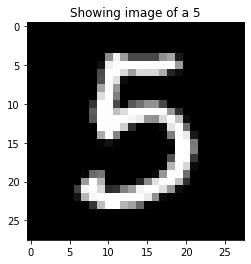

Raw estimates:
[-0.19393539  0.01653976 -0.12825941  0.21520966  0.11434191  0.83608226
 -0.06921926  0.03377747  0.01113293 -0.0850899 ]
The prediction is 5, the actual label is 5


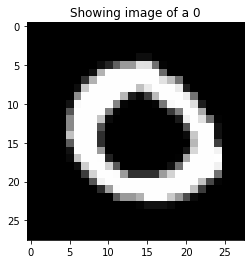

Raw estimates:
[ 0.95513414  0.01815565 -0.00489118 -0.0144286  -0.10863411 -0.04178639
 -0.02744638 -0.01153925 -0.09289322  0.0058144 ]
The prediction is 0, the actual label is 0


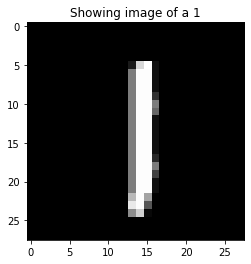

Raw estimates:
[-0.04778847  0.7103059   0.01165107  0.01644583  0.14137401  0.07262154
 -0.10788326 -0.01113548  0.29011804  0.14984715]
The prediction is 1, the actual label is 1


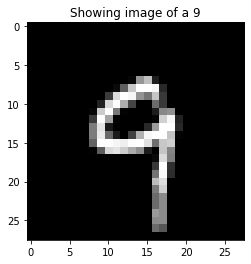

Raw estimates:
[ 0.02468569 -0.02910351  0.0638563   0.08811893  0.11128554 -0.15601176
 -0.00351364  0.01479034  0.2106956   0.68404765]
The prediction is 9, the actual label is 9


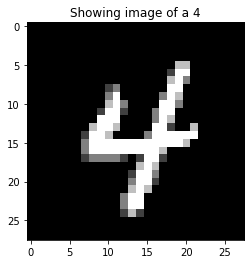

Raw estimates:
[ 0.04970162  0.00473852  0.04534451  0.00745813  1.04458797  0.03703533
 -0.04670714 -0.00162815 -0.06098982 -0.09447927]
The prediction is 4, the actual label is 4


In [55]:
import matplotlib.pyplot as plt
import pickle

for test_element_number in range(5):
    test_example = X_test[test_element_number]
    test_example = test_example.reshape((28, 28))

    plt.title(f"Showing image of a {y_test[test_element_number]}")
    plt.imshow(test_example, cmap='gray')
    plt.show()
    
    model = pickle.load(open('models/mnist_net.p', 'rb'))
    print('Raw estimates:')
    pred = model.predict(X_test[test_element_number])
    print(pred)

    clean_pred = pred.argmax()
    print(f"The prediction is {clean_pred}, the actual label is {y_test[test_element_number]}")


